In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from matplotlib.ticker import StrMethodFormatter


In [2]:
df=pd.read_csv('imdb.csv',escapechar='\\')
df1=pd.read_csv('movie_metadata.csv',escapechar='\\')


In [3]:
df.describe()

,imdbRating,ratingCount,duration,year,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
count,13551.000000,1.355100e+04,13745.000000,14731.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,...,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000
mean,6.865707,2.642480e+04,5424.595417,1990.691263,3.090509,4.511754,23.545830,248.223630,103.239550,2.232234,...,0.010839,0.008604,0.127227,0.066798,0.037735,0.016056,0.036109,0.089493,0.032112,0.022153
std,1.119515,6.506456e+04,2784.823414,22.220563,9.226644,16.182953,65.285788,1051.247069,229.107375,0.828764,...,0.103550,0.092360,0.333239,0.249680,0.190560,0.125694,0.186567,0.285463,0.176303,0.147186
min,1.000000,5.000000e+00,2.000000,1888.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.300000,6.025000e+02,3720.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,3.977000e+03,5700.000000,1999.000000,0.000000,0.000000,7.000000,8.000000,30.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.600000,2.085850e+04,6660.000000,2007.000000,2.000000,3.000000,26.000000,101.000000,103.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.900000,1.183395e+06,68400.000000,2017.000000,226.000000,542.000000,2810.000000,32345.000000,4928.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df2=pd.DataFrame(columns=['dur','imdb_r'])
df2['dur']=df['duration']
df2['imdb_r']=df['imdbRating']


In [5]:
df2['imdb_r'].fillna(0,inplace=True)


In [6]:
df2['dura']=np.log10(df2['dur'])

In [7]:
df2['dura'].fillna(0,inplace=True)

In [8]:
df2['dur'].fillna(0,inplace=True)

In [9]:
#df2

In [10]:
kmeans = KMeans(n_clusters=6).fit(df2)
y_kmeans= kmeans.predict(df2)

Text(0.5, 1.0, 'duration vs imdbRating')

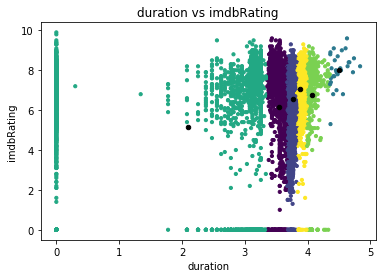

In [11]:
plt.scatter(df2.iloc[:, 2], df2.iloc[:, 1], c=y_kmeans, s=10,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 1], c='black', s=20, alpha=1.0)
plt.xlabel('duration')
plt.ylabel('imdbRating')
plt.title('duration vs imdbRating')

In [12]:
df1.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [13]:
df3=pd.DataFrame(columns=['dur','imdb_r'])
df3['dur']=df1['duration']
df3['imdb_r']=df1['imdb_score']

In [14]:
df3['imdb_r'].fillna(0,inplace=True)

In [15]:
df3['dura']=np.log10(df3['dur'])

In [16]:
df3['dura'].fillna(0,inplace=True)

df3['dur'].fillna(0,inplace=True)

In [17]:
#df3


In [18]:
kmeans = KMeans(n_clusters=6).fit(df3)
y_kmeans= kmeans.predict(df3)

Text(0.5, 1.0, 'duration vs imdb_score')

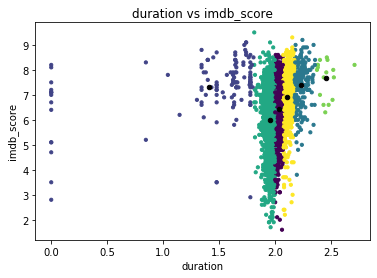

In [19]:
plt.scatter(df3.iloc[:, 2], df3.iloc[:, 1], c=y_kmeans, s=10,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 1], c='black', s=20, alpha=1.0)
plt.xlabel('duration')
plt.ylabel('imdb_score')
plt.title('duration vs imdb_score')

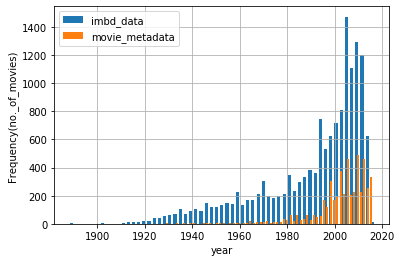

In [20]:
df['year'].hist(bins='auto',rwidth=.6,label='imbd_data')
df1['title_year'].hist(bins='auto',rwidth=.6,label='movie_metadata')
plt.xlabel("year")
plt.ylabel("Frequency(no._of_movies)")
plt.legend()

In [21]:
df


,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550.0,3240.0,1921.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319.0,5700.0,1925.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007.0,9180.0,1927.0,video.movie,...,0,0,0,1,0,0,0,0,0,0
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521.0,6420.0,1926.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057.0,5220.0,1931.0,video.movie,...,0,0,1,0,0,0,0,0,0,0
5,titles01/tt0022100,tt0022100,M (1931),m,http://www.imdb.com/title/tt0022100/,8.5,73726.0,7020.0,1931.0,video.movie,...,0,0,0,0,0,0,0,1,0,0
6,titles01/tt0025316,tt0025316,Es geschah in einer Nacht (1934),es geschah in einer nacht,http://www.imdb.com/title/tt0025316/,8.3,46503.0,6300.0,1934.0,video.movie,...,0,0,1,0,0,0,0,0,0,0
7,titles01/tt0027977,tt0027977,Moderne Zeiten (1936),moderne zeiten,http://www.imdb.com/title/tt0027977/,8.6,90847.0,5220.0,1936.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
8,titles01/tt0031381,tt0031381,Vom Winde verweht (1939),vom winde verweht,http://www.imdb.com/title/tt0031381/,8.2,160414.0,14280.0,1939.0,video.movie,...,0,0,1,0,0,0,0,0,1,0
9,titles01/tt0031679,tt0031679,Mr. Smith geht nach Washington (1939),mr smith geht nach washington,http://www.imdb.com/title/tt0031679/,8.4,58169.0,7740.0,1939.0,video.movie,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_w=pd.DataFrame()
df_w=df[['nrOfGenre', 'nrOfWins']].groupby('nrOfGenre').count().reset_index()
df_w

,nrOfGenre,nrOfWins
0,0,204
1,1,3141
2,2,4439
3,3,6977


In [23]:
Genre =df_w['nrOfGenre']

In [24]:
wins=df_w['nrOfWins']

In [25]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c","#d62728"]
explode = (0.1, 0.1, 0.1,0.1)

Text(0.5, 1.0, 'Achievements vs total genre movie contain')

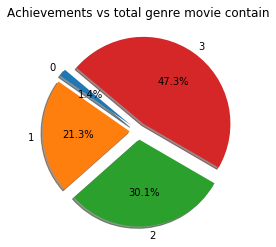

In [26]:
plt.pie(wins, labels=Genre,colors=colors,explode=explode,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Achievements vs total genre movie contain")

In [27]:
a=df1['director_facebook_likes'].sum()
b=df1['actor_1_facebook_likes'].sum()
c=df1['actor_2_facebook_likes'].sum()
d=df1['actor_3_facebook_likes'].sum()

In [28]:
data = {'Person':['Director', 'Actor1', 'Actor2', 'Actor3'], 'likes':[a, b, c, d]}


In [29]:
df_f = pd.DataFrame(data)

In [30]:
df_f

,Person,likes
0,Director,3390669.0
1,Actor1,33036397.0
2,Actor2,8308325.0
3,Actor3,3237949.0


In [31]:
person =df_f['Person']

In [32]:
likes =df_f['likes']

In [33]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c","#d62728"]
explode = (0.1, 0.1, 0.1, 0.1)

Text(0.5, 1.0, 'Most liked person in movie cast')

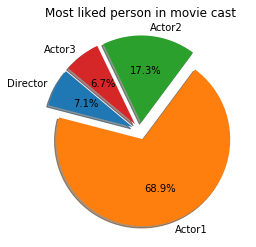

In [34]:
plt.pie(likes, labels=person,colors=colors,explode=explode,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Most liked person in movie cast")